# Logistic Regression with penguins

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

## 1. Define (business) goal

Train a model that is better than the DummyClassifier to predict if a penguin belongs to the **Gentoo** or the **Adelie** `species` using only the feature `body mass`

## 2. Get Data 

- Read in data set from seaborn
- Get rid of the third class (Chinstrap) as we want a binary classification

In [3]:
df = sns.load_dataset('penguins')

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df = df.loc[df['species']!= 'Chinstrap']

is equivalent to

In [6]:
df.loc[(df['species'] == 'Adelie')|(df['species'] == 'Gentoo'),:]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [7]:
df.dropna(inplace = True)

In [8]:
df.shape

(265, 7)

## 3. Train-test split 

Define y and X

In [9]:
y = df['species']

In [10]:
X = df[['body_mass_g']]

In [11]:
X.shape, y.shape

((265, 1), (265,))

Train-test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [14]:
X_train.shape, y_train.shape

((212, 1), (212,))

In [15]:
X_test.shape, y_test.shape

((53, 1), (53,))

## 4. Explore the data

If we splitted the data before and we want to explore the data with our labels, we can create a `df_train` re-adding our labels.

In [16]:
df_train = pd.concat([X_train, y_train], axis = 1)

In [17]:
df_train.shape

(212, 2)

In [18]:
df_train.head()

,body_mass_g,species
247,5650.0,Gentoo
308,4875.0,Gentoo
23,3950.0,Adelie
96,3700.0,Adelie
257,5250.0,Gentoo


`sns.catplot`

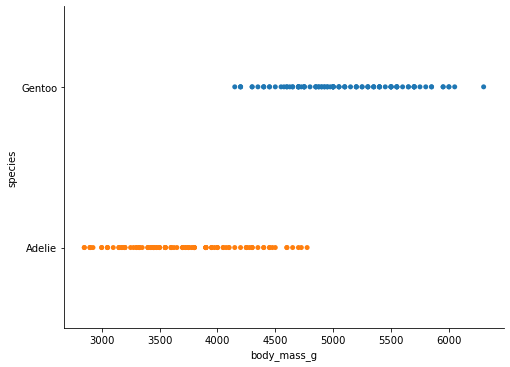

In [19]:
sns.catplot(data = df_train, x = 'body_mass_g', y = 'species', jitter = False, aspect = 1.4)

## 5. Feature Engineering 

Skipped for now: topic for tomorrow. 'Luckily' our goal was defines using only numerical values.

## 6. Train Model

#### Baseline

In [20]:
from sklearn.dummy import DummyClassifier

In [21]:
dm = DummyClassifier(strategy= 'most_frequent')

In [22]:
dm.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [23]:
round(dm.score(X_test, y_test),2)

0.62

### Logistic regression
* The model will find the coefficients (`w1`, `w0`) of the logistic function that result in the most accurate model (smallest possible log loss)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
m = LogisticRegression()

In [26]:
m.fit(X_train, y_train)

LogisticRegression()

Take a look at the coefficients

In [27]:
m.coef_

array([[0.0063681]])

In [28]:
m.intercept_,2

(array([-28.18698229]), 2)

In [29]:
f' w1: {m.coef_} and w0: {m.intercept_}'

' w1: [[0.0063681]] and w0: [-28.18698229]'

#### Bonus for simple example: check output Sigmoid Function

In [30]:
# Create the sigmoid function
def sigmoid_function(x, b, w):
    '''Calculates the y value for given x, b and w'''
    y = 1/(1+np.exp(-(b + w*x)))
    return y

In [51]:
s = sigmoid_function(X, m.intercept_, m.coef_)

In [52]:
df['Sigmoid'] = s

In [53]:
df['Class'] = 0

In [54]:
df.loc[df['species'] == "Adelie", 'Class'] = 1

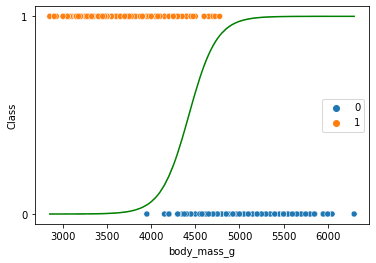

In [55]:
sns.scatterplot(x = df['body_mass_g'], y = df["Class"], hue = df["Class"])
plt.yticks([0,1])
sns.lineplot(x = df['body_mass_g'], y = df["Sigmoid"], color = "green")

### 7. Optimize
Not for now.

## 8. Evaluate model

In [56]:
# calculate the accuracy
round(m.score(X_test, y_test),2)

0.92

## 9. Predict

In [57]:
m.predict(X_test)

array(['Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie'], dtype=object)

In [60]:
m.predict_proba(X_test)

array([[9.86636615e-03, 9.90133634e-01],
       [9.97264356e-01, 2.73564436e-03],
       [9.99816862e-01, 1.83137647e-04],
       [9.54043151e-01, 4.59568490e-02],
       [5.41743394e-01, 4.58256606e-01],
       [9.92920411e-01, 7.07958946e-03],
       [1.93931977e-01, 8.06068023e-01],
       [6.90866347e-01, 3.09133653e-01],
       [9.54043151e-01, 4.59568490e-02],
       [9.97264356e-01, 2.73564436e-03],
       [5.80923482e-01, 4.19076518e-01],
       [2.48569562e-01, 7.51430438e-01],
       [9.70988242e-01, 2.90117582e-02],
       [9.37882752e-01, 6.21172480e-02],
       [1.58758085e-04, 9.99841242e-01],
       [5.67132008e-04, 9.99432868e-01],
       [5.24345274e-03, 9.94756547e-01],
       [3.81906760e-03, 9.96180932e-01],
       [9.99843812e-01, 1.56188344e-04],
       [9.99100764e-01, 8.99235869e-04],
       [9.98945742e-01, 1.05425810e-03],
       [1.70249075e-01, 8.29750925e-01],
       [8.53132864e-01, 1.46867136e-01],
       [4.12543641e-04, 9.99587456e-01],
       [7.796025